<a href="https://colab.research.google.com/github/Dh2Cool/Deep-Learning/blob/main/anomaly_prism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from keras.layers import RepeatVector
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [ ]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [ ]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

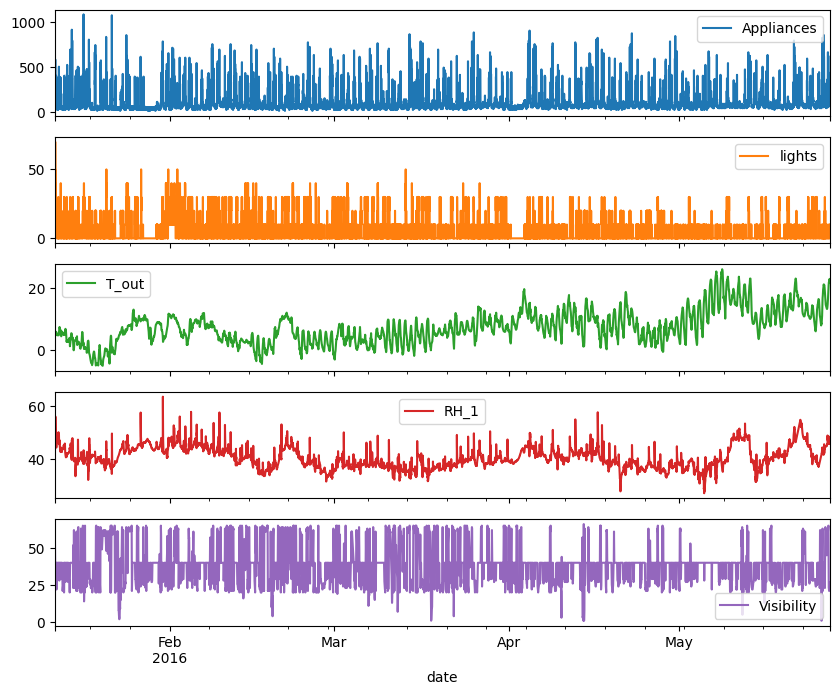

In [ ]:
df.set_index('date')[['Appliances', 'lights','T_out', 'RH_1', 'Visibility']].plot(subplots=True)

In [ ]:
df_input=df[['Appliances','T_out', 'RH_1', 'Visibility']]
df_input

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)
data_scaled

array([[0.04672897, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [ ]:
features=data_scaled
target=data_scaled[:,0]

In [ ]:
TimeseriesGenerator(features, target, length=10, sampling_rate=1, batch_size=10)[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         [0.03738318, 0.35423365, 0.52297954, 0.65897436],
         [0.04672897, 0.35048232, 0.51582424, 0.6       ],
         [0.04672897, 0.35101822, 0.51013668, 0.6       ],
         [0.04672897, 0.35155413, 0.5111687 , 0.6       ],
         [0.05607477, 0.35209003, 0.5247225 , 0.6       ]],
 
        [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         [0.03738318, 0.35423365, 0.52297954, 0.65897436],
         [0.04672897, 0.35048232, 0.51582424, 0.6       ],
         [0.04672897, 0.35101822, 0.51013668, 0.6    

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)
x_train.shape



(15788, 4)

In [ ]:
x_test.shape


(3947, 4)

In [ ]:
win_length=720
batch_size=32
num_features=4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

model.add(tf.keras.layers.LSTM(128, return_sequences=False))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))

model.add(RepeatVector(win_length))

model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

model.add(tf.keras.layers.LSTM(128, return_sequences=False))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Reshape((1, 128)))

model.add(tf.keras.layers.GRU(128))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(1))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 720, 128)          68096     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 720, 128)          0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 128)               0         
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 repeat_vector_3 (RepeatVect  (None, 720, 128)         0         
 or)                                                             
                                                      

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50


<ipython-input-20-8a7d7189a281>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50,


471/471 [==============================] - 75s 97ms/step - loss: 0.0092 - mean_absolute_error: 0.0555 - val_loss: 0.0061 - val_mean_absolute_error: 0.0524
Epoch 2/50
471/471 [==============================] - 43s 92ms/step - loss: 0.0059 - mean_absolute_error: 0.0413 - val_loss: 0.0041 - val_mean_absolute_error: 0.0379
Epoch 3/50
471/471 [==============================] - 44s 93ms/step - loss: 0.0046 - mean_absolute_error: 0.0349 - val_loss: 0.0034 - val_mean_absolute_error: 0.0299
Epoch 4/50
471/471 [==============================] - 43s 92ms/step - loss: 0.0043 - mean_absolute_error: 0.0332 - val_loss: 0.0033 - val_mean_absolute_error: 0.0297
Epoch 5/50
471/471 [==============================] - 45s 95ms/step - loss: 0.0043 - mean_absolute_error: 0.0325 - val_loss: 0.0033 - val_mean_absolute_error: 0.0285
Epoch 6/50
471/471 [==============================] - 45s 96ms/step - loss: 0.0042 - mean_absolute_error: 0.0323 - val_loss: 0.0033 - val_mean_absolute_error: 0.0280
Epoch 7/50
471/

In [ ]:
model.save('prism.h5')
from google.colab import files
files.download('prism.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-21-a68ec1088d46>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.003263566642999649, 0.030052244663238525]

In [ ]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-19-ef1e1eabfd74>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.0033687001559883356, 0.03113287128508091]

In [ ]:
predictions=model.predict_generator(test_generator)

<ipython-input-22-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final['App_Pred']=rev_trans[:,0]

<ipython-input-26-62669267b60b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']=rev_trans[:,0]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mse = mean_squared_error(df_final['Appliances'], df_final['App_Pred'])
rmse = mean_squared_error(df_final['Appliances'], df_final['App_Pred'], squared=False)
mae = mean_absolute_error(df_final['Appliances'], df_final['App_Pred'])
r2 = r2_score(df_final['Appliances'], df_final['App_Pred'])
print(f'mse is {mse} \nrmse is {rmse} \nmae is {mae} \nr2 is {r2}')

mse is 3736.4567662534614 
rmse is 61.126563507639304 
mae is 32.155902292781434 
r2 is 0.5429484323672439


<ipython-input-32-38629a03e1c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['trainMAE'] = trainMAE
<ipython-input-32-38629a03e1c1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['anomaly'] = df_final['trainMAE'] > threshold


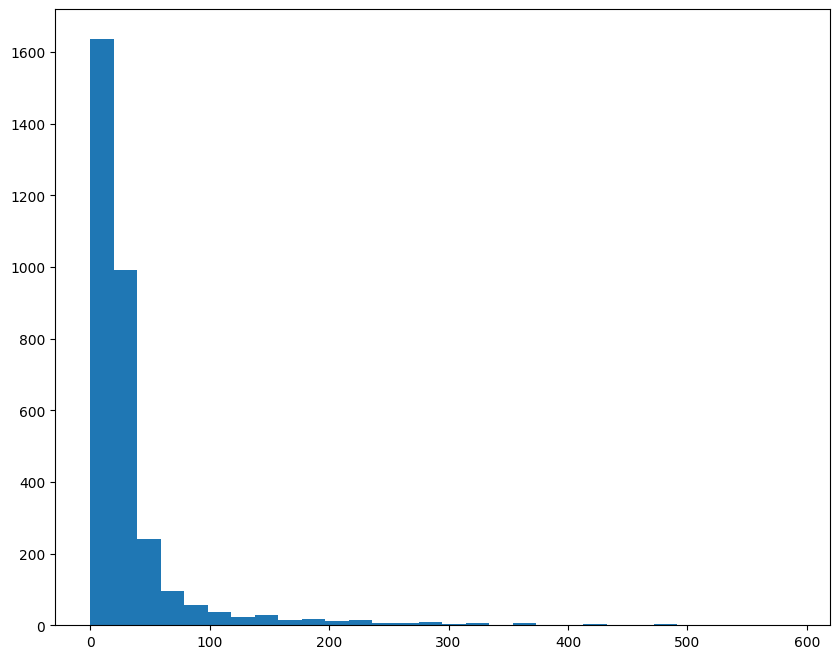

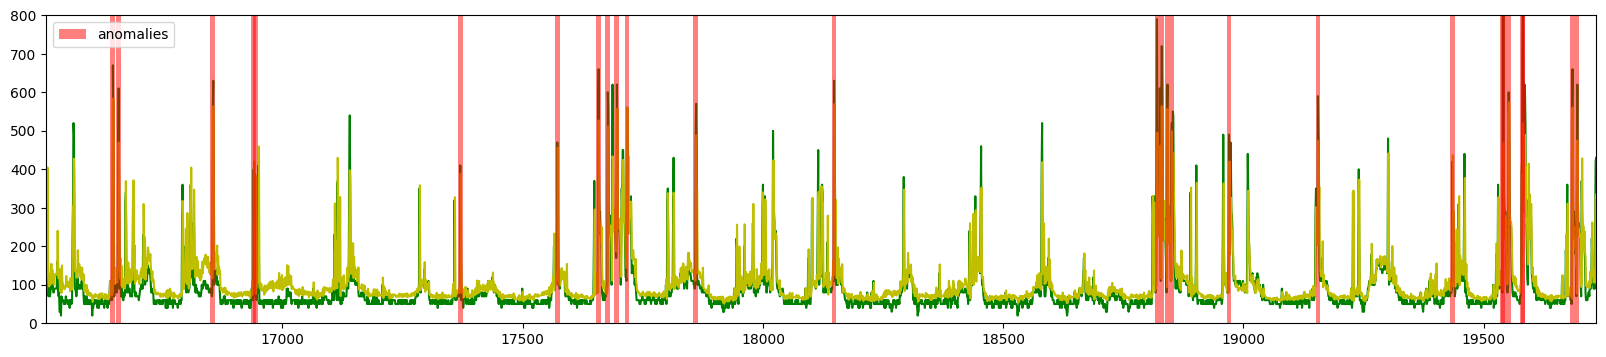

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
trainMAE = (np.abs(df_final['Appliances'] - df_final['App_Pred']))
plt.hist(trainMAE, bins=30)
threshold = 300
df_final['trainMAE'] = trainMAE
#df.set_index('date')[['Appliances','App_Pred']].plot()
#df_final[['Appliances','App_Pred']].plot()
df_final['anomaly'] = df_final['trainMAE'] > threshold
anomalies = df_final.loc[df_final['anomaly'] == True]

plt.figure(figsize = (20,4))
plt.plot(df_final.index, df_final['Appliances'], 'g', df_final.index, df_final['App_Pred'], 'y', zorder=0)
plt.bar(anomalies.index,800,zorder=1,color='red',width=10,alpha=0.5,label='anomalies')
plt.legend(loc="upper left")
plt.xlim(xmin=16508,xmax=19734)
plt.ylim(ymax=800)
plt.show()

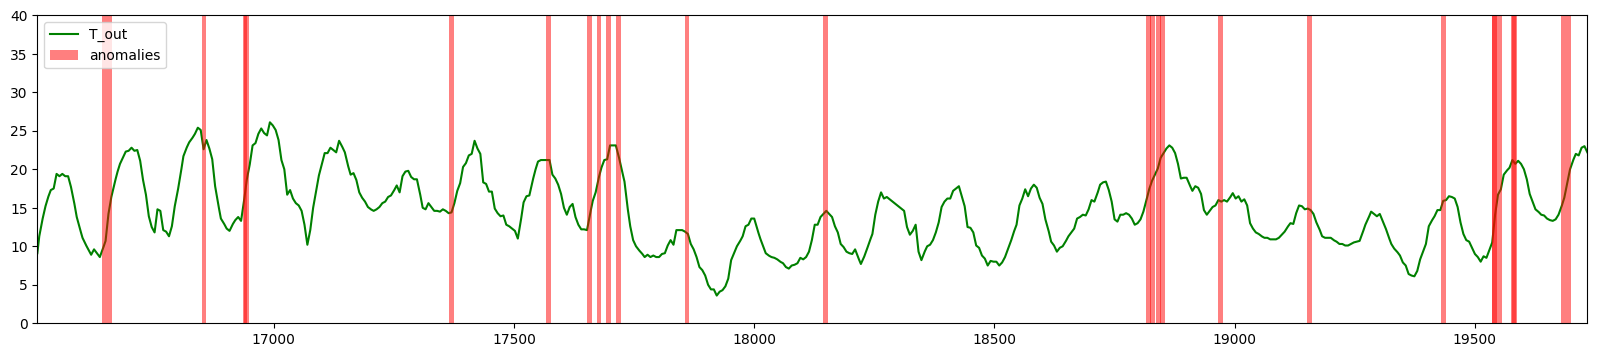

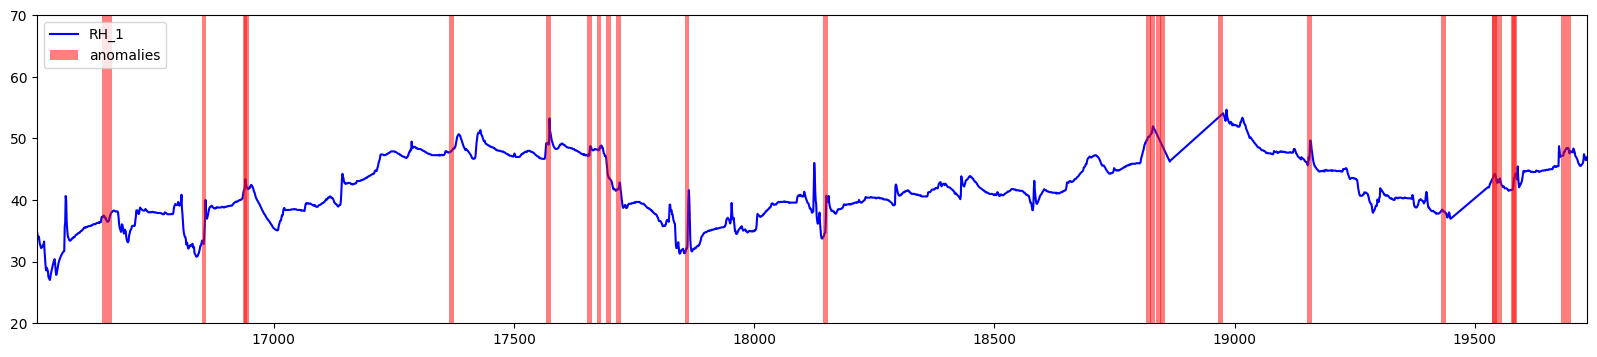

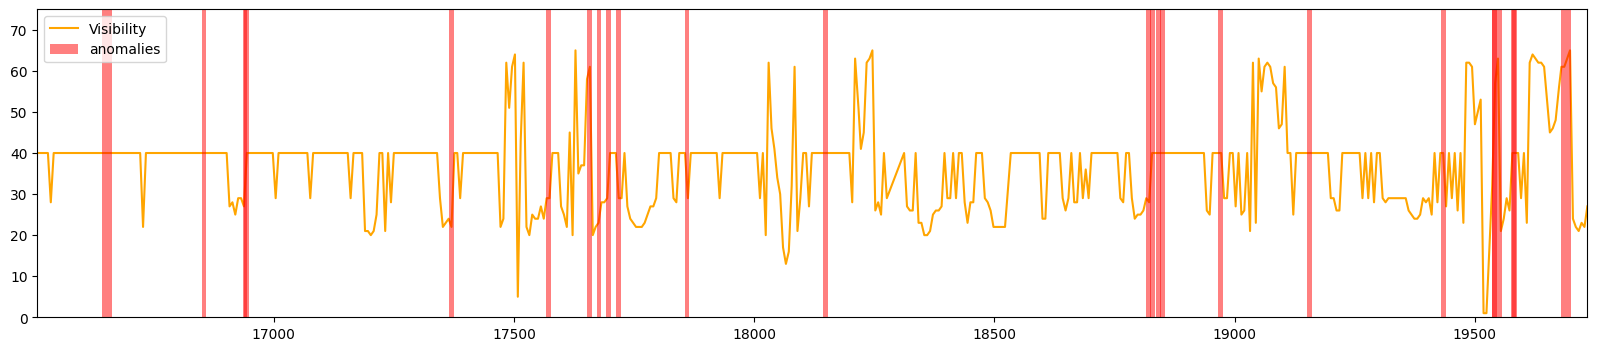

In [ ]:
plt.figure(figsize = (20,4))
plt.plot(df_final.index, df_final['T_out'], 'g', zorder=0,label='T_out')
plt.bar(anomalies.index,40,zorder=1,color='red',width=10,alpha=0.5,label='anomalies')
plt.legend(loc="upper left")
plt.xlim(xmin=16508,xmax=19734)
plt.ylim(ymax=40)
plt.show()

plt.figure(figsize = (20,4))
plt.plot(df_final.index, df_final['RH_1'], 'b', zorder=0,label='RH_1')
plt.bar(anomalies.index,70,zorder=1,color='red',width=10,alpha=0.5,label='anomalies')
plt.legend(loc="upper left")
plt.xlim(xmin=16508,xmax=19734)
plt.ylim(ymin = 20,ymax=70)
plt.show()

plt.figure(figsize = (20,4))
plt.plot(df_final.index, df_final['Visibility'], 'orange', zorder=0,label='Visibility')
plt.bar(anomalies.index,75,zorder=1,color='red',width=10,alpha=0.5,label='anomalies')
plt.legend(loc="upper left")
plt.xlim(xmin=16508,xmax=19734)
plt.ylim(ymax=75)
plt.show()


In [ ]:
'''
lstm + autoencoder
# adams
mse is 3856.8247777561023
rmse is 62.1033395056667
mae is 33.312168153026526
r2 is 0.528224753815148

# RMSprop
mse is 4725.791288031111
rmse is 68.74439095687089
mae is 45.44275117063157
r2 is 0.42193086883603914

# AdaDelta
mse is 8061.013749327828
rmse is 89.78314847078948
mae is 53.38167326958336
r2 is 0.013959159352531447

#AdaGrad
mse is 7081.383059642327
rmse is 84.15095400316224
mae is 52.780310398156445
r2 is 0.13378972890863694

#lstm + gru
mse is 3736.4567662534614
rmse is 61.126563507639304
mae is 32.155902292781434
r2 is 0.5429484323672439
'''

'\nlstm + autoencoder\n# adams \nmse is 3856.8247777561023\nrmse is 62.1033395056667\nmae is 33.312168153026526\nr2 is 0.528224753815148\n\n# RMSprop\nmse is 4725.791288031111\nrmse is 68.74439095687089\nmae is 45.44275117063157\nr2 is 0.42193086883603914\n\n# AdaDelta\nmse is 8061.013749327828\nrmse is 89.78314847078948\nmae is 53.38167326958336\nr2 is 0.013959159352531447\n\n#AdaGrad\nmse is 7081.383059642327\nrmse is 84.15095400316224\nmae is 52.780310398156445\nr2 is 0.13378972890863694\n\n#lstm + gru\nmse is 3736.4567662534614\nrmse is 61.126563507639304\nmae is 32.155902292781434\nr2 is 0.5429484323672439\n'